# TF-IDF  --  SVM

*****

## Load Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
DATA_PATH = os.path.join(os.getcwd(), 'data')
test_data_path = os.path.join(DATA_PATH, 'test.csv')
train_data_path = os.path.join(DATA_PATH, 'train.csv')

In [3]:
df_train = pd.read_csv(train_data_path, keep_default_na=False)
df_test = pd.read_csv(test_data_path, keep_default_na=False)

In [4]:
def map_sentiment(sentiment):
    if sentiment == 'negative':
        return 0
    elif sentiment == 'neutral':
        return 1
    else:
        return 2
    
df_train['class'] = df_train['sentiment'].map(map_sentiment)
df_test['class'] = df_test['sentiment'].map(map_sentiment)

In [5]:
df_train

,textID,text,selected_text,sentiment,class
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0
2,088c60f138,my boss is bullying me...,bullying me,negative,0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0
...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,0
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,0
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,2
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,2


*****

## TF-IDF SVM

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [ ]:
def threshold_trial(threshold):
    vectorizer = TfidfVectorizer(max_features=threshold)
    X_train = vectorizer.fit_transform(df_train['text']).toarray()
    X_test = vectorizer.transform(df_test['text']).toarray()
    y_train = df_train['class']
    y_test = df_test['class']
    model = svm.SVC(decision_function_shape='ovr')
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    return acc
# thresholds = range(50, 400, 5)
# accs = []
# for i in thresholds:
#     print(i)
#     accs.append(threshold_trial(i))
print(threshold_trial(1000))

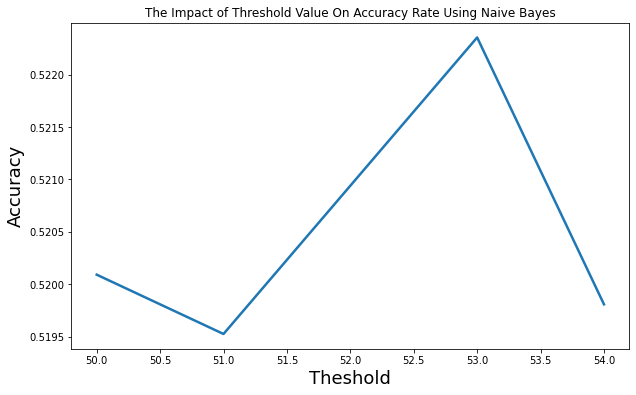

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(thresholds, accs, linewidth=2.5)
plt.xlabel('Theshold', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.title('The Impact of Threshold Value On Accuracy Rate Using Naive Bayes')
plt.show()

*****

# TF-IDF SGDSVM

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import datetime

# load data

In [9]:
import os
DATA_PATH = os.path.join(os.getcwd(), 'data')
test_data_path = os.path.join(DATA_PATH, 'test.csv')
train_data_path = os.path.join(DATA_PATH, 'train.csv')

In [10]:
df_train = pd.read_csv(train_data_path, keep_default_na=False)
df_test = pd.read_csv(test_data_path, keep_default_na=False)

In [11]:
def map_sentiment(sentiment):
    if sentiment == 'negative':
        return 0
    elif sentiment == 'neutral':
        return 1
    else:
        return 2

df_train['class'] = df_train['sentiment'].map(map_sentiment)
df_test['class'] = df_test['sentiment'].map(map_sentiment)

get TF-IDF data

In [12]:
def TF_IDF_data(threshold):
    vectorizer = TfidfVectorizer(max_features=threshold)
    X_train = vectorizer.fit_transform(df_train['text']).toarray()
    X_test = vectorizer.transform(df_test['text']).toarray()
    y_train = df_train['class']
    y_test = df_test['class']
    return X_train, y_train, X_test, y_test
# thresholds = range(50, 400, 5)
# accs = []
# for i in thresholds:
#     print(i)
#     accs.append(threshold_trial(i))

## SVM model

In [ ]:
lst_threshold = [600, 800, 1000, 1200]
acc = []
for threshold in lst_threshold:
    print('start time: %s' % datetime.datetime.now())
    print('threshold: %s' % threshold)
    X_train, y_train, X_test, y_test = TF_IDF_data(threshold)
    model = svm.NuSVC(gamma='auto')
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))
    print('accuracy: %s' % acc[-1])
    print('end time: %s' % datetime.datetime.now())

In [53]:
lst_threshold2 = [2000, 3000]
acc2 = []
for threshold in lst_threshold2:
    print('start time: %s' % datetime.datetime.now())
    print('threshold: %s' % threshold)
    X_train, y_train, X_test, y_test = TF_IDF_data(threshold)
    model = svm.NuSVC(gamma='auto')
    model.fit(X_train, y_train)
    acc2.append(model.score(X_test, y_test))
    print('accuracy: %s' % acc2[-1])
    print('end time: %s' % datetime.datetime.now())

start time: 2020-12-02 18:36:10.176357
threshold: 2000
accuracy: 0.711092246745897
end time: 2020-12-02 20:01:09.863853
start time: 2020-12-02 20:01:09.864878
threshold: 3000
accuracy: 0.7184493491794001
end time: 2020-12-02 22:14:14.286497


In [59]:
accs = [0] + acc + acc2
lst = [0] + lst_threshold + lst_threshold2

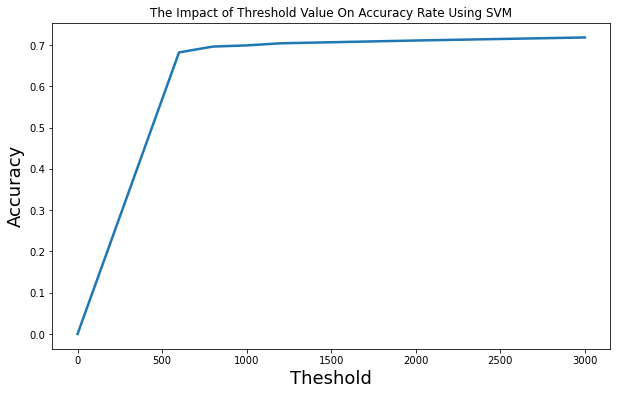

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(lst, accs, linewidth=2.5)
plt.xlabel('Theshold', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.title('The Impact of Threshold Value On Accuracy Rate Using SVM')
plt.show()

## SGD SVM

In [14]:
threshold = 10
X_train, y_train, X_test, y_test = TF_IDF_data(threshold)
model = svm.SVC(decision_function_shape='ovr')
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
print(acc)

0.41482739105829086


In [15]:
threshold = 10
X_train, y_train, X_test, y_test = TF_IDF_data(threshold)
model = svm.SVC(decision_function_shape='ovo')
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
print(acc)

0.41482739105829086


In [15]:
lst_threshold = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2800, 3000]
accs = []
for threshold in lst_threshold:
    X_train, y_train, X_test, y_test = TF_IDF_data(threshold)
    model = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
    model.fit(X_train, y_train)
    # Pipeline(steps=[('standardscaler', StandardScaler()),
    #                 ('sgdclassifier', SGDClassifier())])
    accs.append(model.score(X_test, y_test))

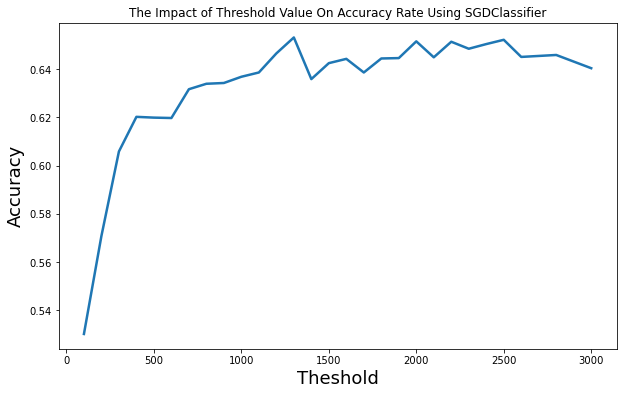

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(lst_threshold, accs, linewidth=2.5)
plt.xlabel('Theshold', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.title('The Impact of Threshold Value On Accuracy Rate Using SGDClassifier')
plt.savefig('SGD-SVM')
plt.show()

In [64]:
print(max(accs))

0.6737408036219581
